In [58]:
# Imports

import numpy as np
import scipy
import matplotlib.pyplot as plt
import utils

# %matplotlib tk
%matplotlib inline

In [59]:
# Top hat + triangle with padding

sampling_freq : int = 1
sound1 : np.ndarray = np.concat(([0]*100, [1]*100, [0]*100)) # top hat
sound2 : np.ndarray = np.concat(([0]*100, np.arange(1, 101)/100, [0]*100)) # triangle

In [60]:
# Top hat + triangle withOUT padding

sampling_freq : int = 1
sound1 : np.ndarray = np.ones(100) # top hat
sound2 : np.ndarray = np.arange(1, 101)/100 # triangle

In [61]:
# Load audio files

sampling_freq, sound1 = scipy.io.wavfile.read("audio/Piano C2.wav")
sampling_freq, sound2 = scipy.io.wavfile.read("audio/Piano C2 - 2.wav")
# Normalise sound volume
sound1 : float = sound1 / (2.**15)
sound2 : float = sound2 / (2.**15)

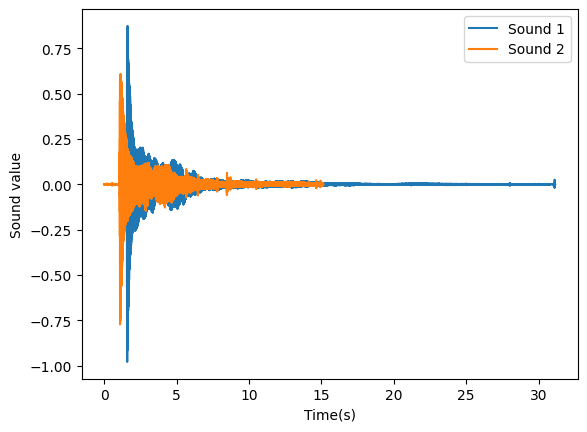

In [62]:
# Plot sounds

utils.plot_sounds(sound1, sound2, sampling_freq=sampling_freq)

In [63]:
# Compute spectrograms for sounds

nfft : int = 2**12

f1, t1, Sxx1 = scipy.signal.spectrogram(sound1, nfft=nfft, nperseg=nfft, fs=sampling_freq)
f2, t2, Sxx2 = scipy.signal.spectrogram(sound2, nfft=nfft, nperseg=nfft, fs=sampling_freq)

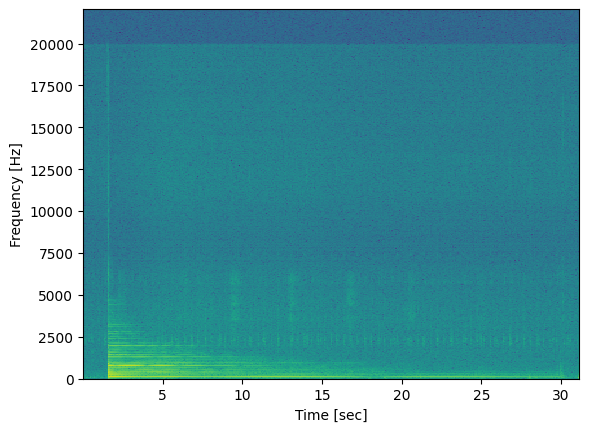

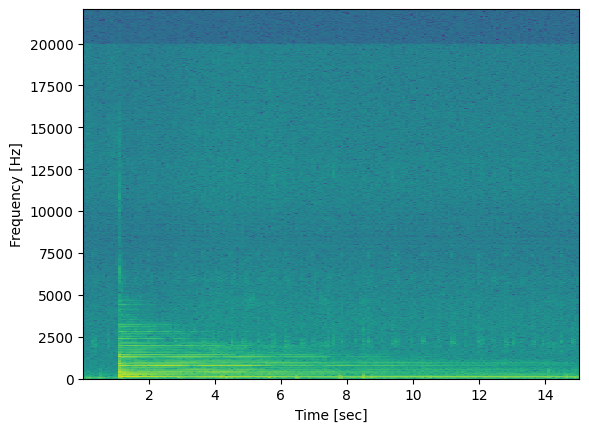

In [64]:
# Draw spectrograms

plt.figure()
plt.pcolormesh(t1, f1, 10*np.log10(Sxx1))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

plt.figure()
plt.pcolormesh(t2, f2, 10*np.log10(Sxx2))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [65]:
# Compute cross correlation

# Zero pad the audio
shift : int = 0
Sxx1_padded = np.pad(Sxx1, pad_width=((0,0), (0, Sxx2.shape[1] - 1)))
Sxx2_padded = np.pad(Sxx2, pad_width=((0,0), (shift, Sxx1.shape[1] - 1 - shift)))

# Take FFTs
fft1 = scipy.fft.rfft(Sxx1_padded, axis=1)
fft2 = scipy.fft.rfft(Sxx2_padded, axis=1)

# Multiply together in frequency domain
fft_product = np.multiply(fft1, np.conjugate(fft2))

# Take IFFT
cross_correlation_spectrum = scipy.fft.irfft(fft_product, axis=1)

# Flatten vertically
cross_correlation = np.sum(cross_correlation_spectrum, axis=0)

# Get scale factor
spectrogram_scale_factor = (sound1.shape[0] + sound2.shape[0] - 1) / (Sxx1.shape[1] + Sxx2.shape[1] - 1)

C:\Users\dapee\AppData\Local\Temp\ipykernel_3128\3010161948.py:4: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(10*np.log10(cross_correlation_spectrum))


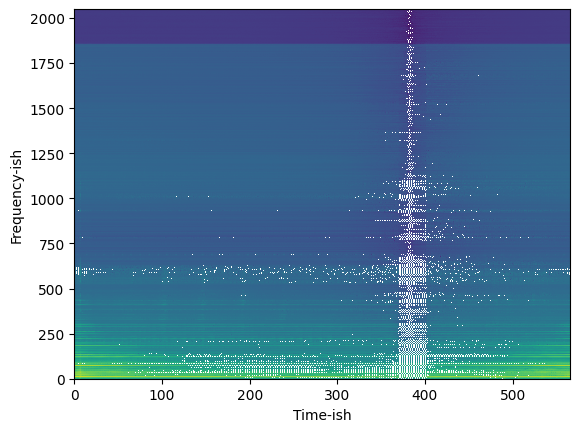

In [66]:
# Plot spectrogram of cross correlation

plt.figure()
plt.pcolormesh(10*np.log10(cross_correlation_spectrum))
plt.ylabel('Frequency-ish')
plt.xlabel('Time-ish')
plt.show()

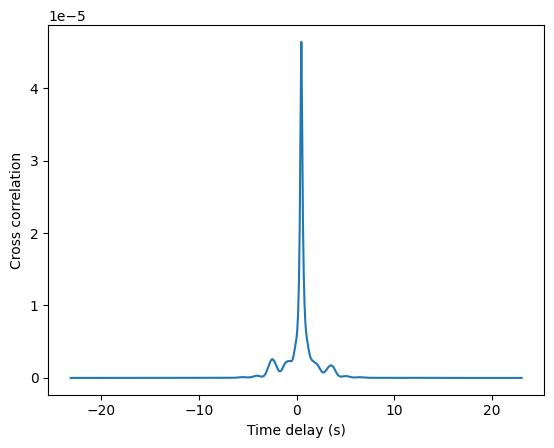

In [67]:
# Plot cross correlation

time_window = cross_correlation.shape[0] / sampling_freq * spectrogram_scale_factor

cross_correlation_shifted : np.ndarray = np.concat((cross_correlation[cross_correlation.shape[0]//2:], cross_correlation[:cross_correlation.shape[0]//2]))

plt.figure()
plt.plot(np.arange(-time_window/2, time_window/2, 1/sampling_freq*spectrogram_scale_factor), cross_correlation_shifted)
plt.xlabel("Time delay (s)")
plt.ylabel("Cross correlation")
plt.show()

In [68]:
# Get max point

peak = np.argmax(cross_correlation)
peak = peak if peak < cross_correlation.shape[0] / 2 else peak - cross_correlation.shape[0]

delay: float = - peak / sampling_freq * spectrogram_scale_factor

print(f"Audio delay: {delay}s")

Audio delay: -0.4894616612076929s


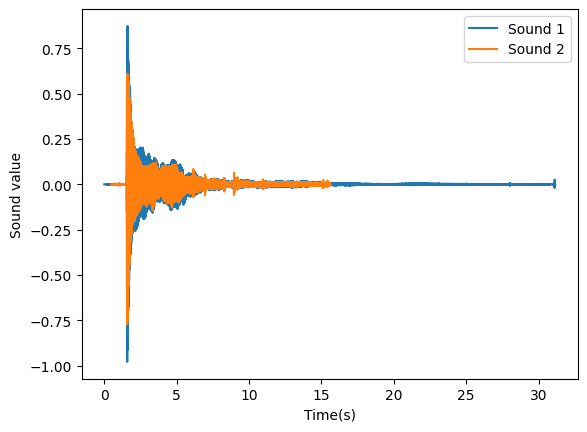

In [69]:
# Plot shifted sounds

utils.plot_sounds(sound1, sound2, sampling_freq=sampling_freq, delay=-delay)

In [71]:
0.49201814058956916 - 0.4894616612076929

0.0025564793818762532